In [2]:
!unzip -q /content/models_predictions.zip -d /content/data

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [88]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [108]:
csv_dir = '/content/data/models_predictions'

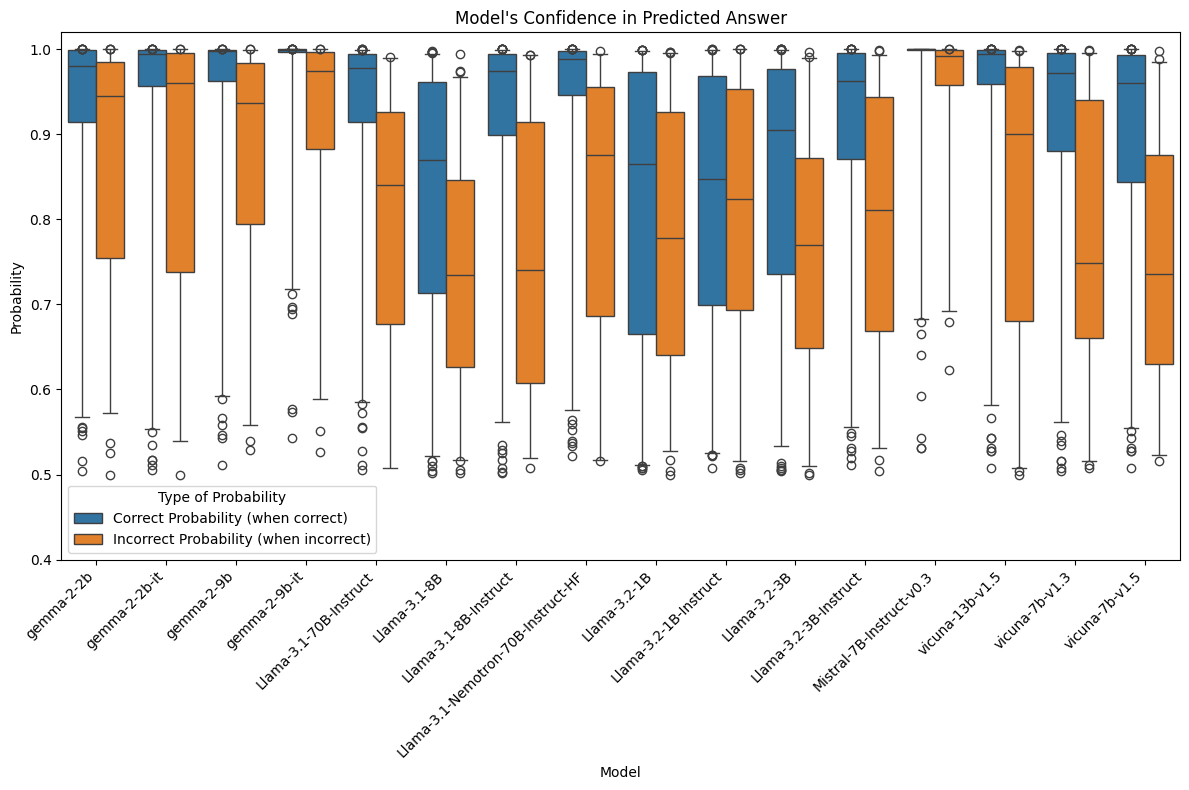

In [111]:
# Initialize a list to store the data with model information
data = []

# Loop over each CSV file in the directory
for filename in os.listdir(csv_dir):
    if filename.endswith(".csv"):
        # Load the CSV file
        file_path = os.path.join(csv_dir, filename)
        df = pd.read_csv(file_path)

        # Add a 'model' column based on the filename
        model_name = filename.replace(".csv", "")
        df['model'] = '_'.join(model_name.split('_')[1:])

        # Append to the list
        data.append(df)

# Concatenate all data into a single DataFrame
all_data = pd.concat(data, ignore_index=True)
all_data['is_correct_prediction'] = all_data['correct_probability'] > all_data['incorrect_probability']
all_data = all_data.sort_values(
    by=['model', 'type'],
    key=lambda col: col.str.lower()
)

# Filter data for correct and incorrect predictions
correct_data = all_data[all_data['is_correct_prediction'] == True][['model', 'correct_probability']]
incorrect_data = all_data[all_data['is_correct_prediction'] == False][['model', 'incorrect_probability']]

# Rename columns for consistency in plotting
correct_data = correct_data.rename(columns={'correct_probability': 'probability'})
incorrect_data = incorrect_data.rename(columns={'incorrect_probability': 'probability'})

# Add a column indicating the type of probability
correct_data['type'] = 'Correct Probability (when correct)'
incorrect_data['type'] = 'Incorrect Probability (when incorrect)'

# Combine the two datasets
plot_data = pd.concat([correct_data, incorrect_data], ignore_index=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a boxplot
sns.boxplot(
    data=plot_data,
    x='model',
    y='probability',
    hue='type',
    dodge=True,
    whis=[2,98]
)
plt.title('Model\'s Confidence in Predicted Answer')
plt.xlabel('Model')
plt.ylabel('Probability')
plt.legend(title='Type of Probability')
plt.ylim(0.4,1.02)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [90]:
plot_data.head()

,model,probability,type
0,gemma-2-2b,0.837620,Correct Probability (when correct)
1,gemma-2-2b,0.958226,Correct Probability (when correct)
2,gemma-2-2b,0.971992,Correct Probability (when correct)
3,gemma-2-2b,0.969785,Correct Probability (when correct)
4,gemma-2-2b,0.835484,Correct Probability (when correct)


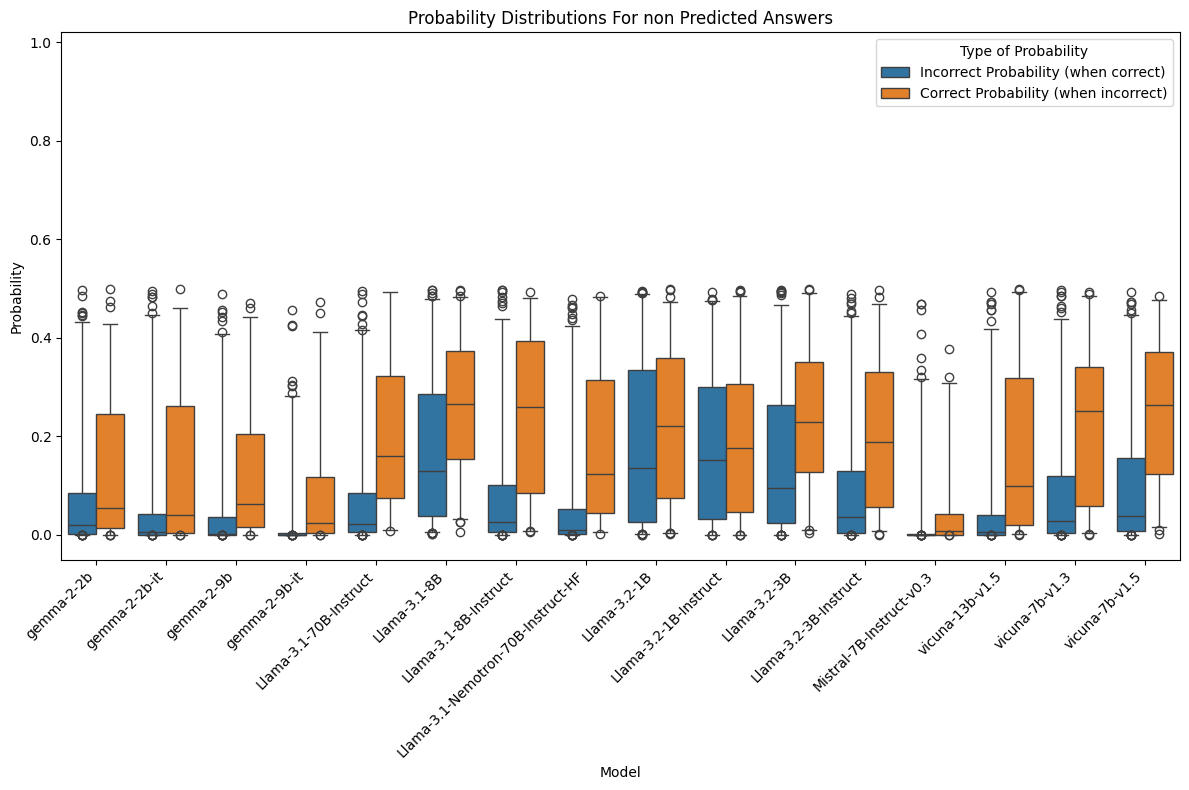

In [119]:
# Filter data for correct and incorrect predictions
correct_data = all_data[all_data['is_correct_prediction'] == True][['model', 'incorrect_probability']]
incorrect_data = all_data[all_data['is_correct_prediction'] == False][['model', 'correct_probability']]

# Rename columns for consistency in plotting
correct_data = correct_data.rename(columns={'incorrect_probability': 'probability'})
incorrect_data = incorrect_data.rename(columns={'correct_probability': 'probability'})

# Add a column indicating the type of probability
correct_data['type'] = 'Incorrect Probability (when correct)'
incorrect_data['type'] = 'Correct Probability (when incorrect)'

# Combine the two datasets
plot_data = pd.concat([correct_data, incorrect_data], ignore_index=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a boxplot
sns.boxplot(
    data=plot_data,
    x='model',
    y='probability',
    hue='type',
    dodge=True,
    whis=[2,98]
)
plt.title('Probability Distributions For non Predicted Answers')
plt.xlabel('Model')
plt.ylabel('Probability')
plt.legend(title='Type of Probability')
plt.ylim(-0.05,1.02)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

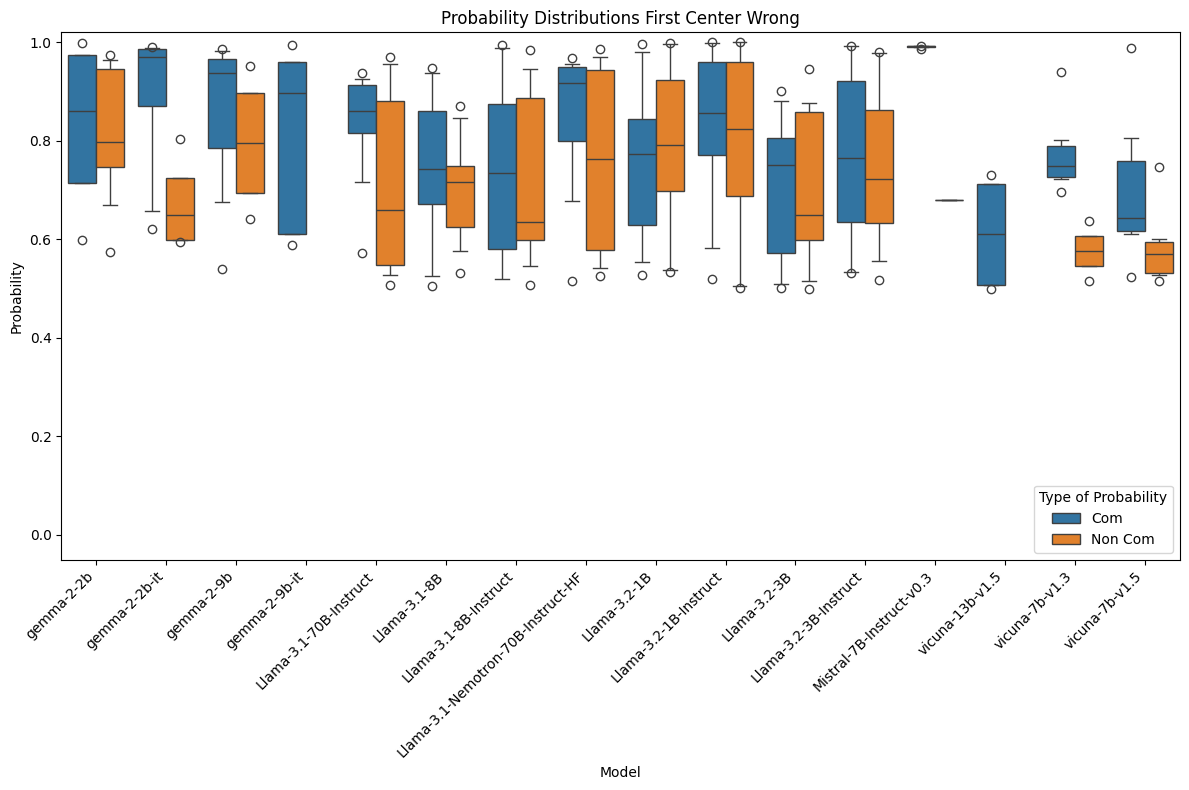

In [116]:
# Filter data for correct and incorrect predictions
com_data = all_data[(all_data['is_correct_prediction'] == False) & (all_data['type'] == 'first_center_com')][['model', 'incorrect_probability']]
non_com_data = all_data[(all_data['is_correct_prediction'] == False) & (all_data['type'].isin(['first_center_sim', 'first_center_sim_rev', 'first_center_mid']))][['model', 'incorrect_probability']]

# Rename columns for consistency in plotting
com_data = com_data.rename(columns={'incorrect_probability': 'probability'})
non_com_data = non_com_data.rename(columns={'incorrect_probability': 'probability'})

# Add a column indicating the type of probability
com_data['type'] = 'Com'
non_com_data['type'] = 'Non Com'

# Combine the two datasets
plot_data = pd.concat([com_data, non_com_data], ignore_index=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a boxplot
sns.boxplot(
    data=plot_data,
    x='model',
    y='probability',
    hue='type',
    dodge=True,
    whis=[2,98]
)
plt.title('Probability Distributions First Center Wrong')
plt.xlabel('Model')
plt.ylabel('Probability')
plt.legend(title='Type of Probability')
plt.ylim(-0.05,1.02)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

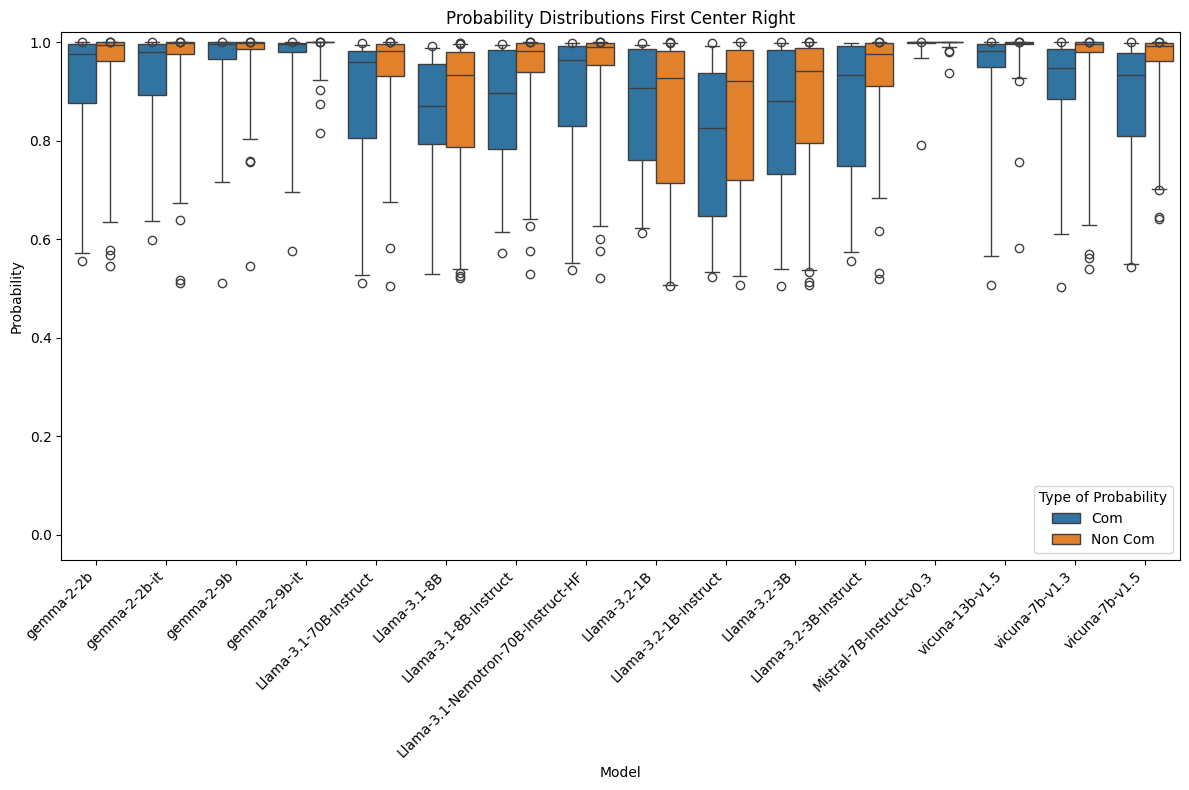

In [117]:
# Filter data for correct and incorrect predictions
com_data = all_data[(all_data['is_correct_prediction'] == True) & (all_data['type'] == 'first_center_com')][['model', 'correct_probability']]
non_com_data = all_data[(all_data['is_correct_prediction'] == True) & (all_data['type'].isin(['first_center_sim', 'first_center_sim_rev', 'first_center_mid']))][['model', 'correct_probability']]

# Rename columns for consistency in plotting
com_data = com_data.rename(columns={'correct_probability': 'probability'})
non_com_data = non_com_data.rename(columns={'correct_probability': 'probability'})

# Add a column indicating the type of probability
com_data['type'] = 'Com'
non_com_data['type'] = 'Non Com'

# Combine the two datasets
plot_data = pd.concat([com_data, non_com_data], ignore_index=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a boxplot
sns.boxplot(
    data=plot_data,
    x='model',
    y='probability',
    hue='type',
    dodge=True,
    whis=[2,98]
)
plt.title('Probability Distributions First Center Right')
plt.xlabel('Model')
plt.ylabel('Probability')
plt.legend(title='Type of Probability')
plt.ylim(-0.05,1.02)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [112]:
accuracy_by_model_and_type = (
    all_data
    .groupby(['model', 'type'])['is_correct_prediction']
    .mean()
    .reset_index()
    .rename(columns={'is_correct_prediction': 'accuracy'})
)
# Case-insensitive sorting by multiple columns (e.g., 'model' and 'type')
accuracy_by_model_and_type = accuracy_by_model_and_type.sort_values(
    by=['model', 'type'],
    key=lambda col: col.str.lower(),
).reset_index(drop=True)


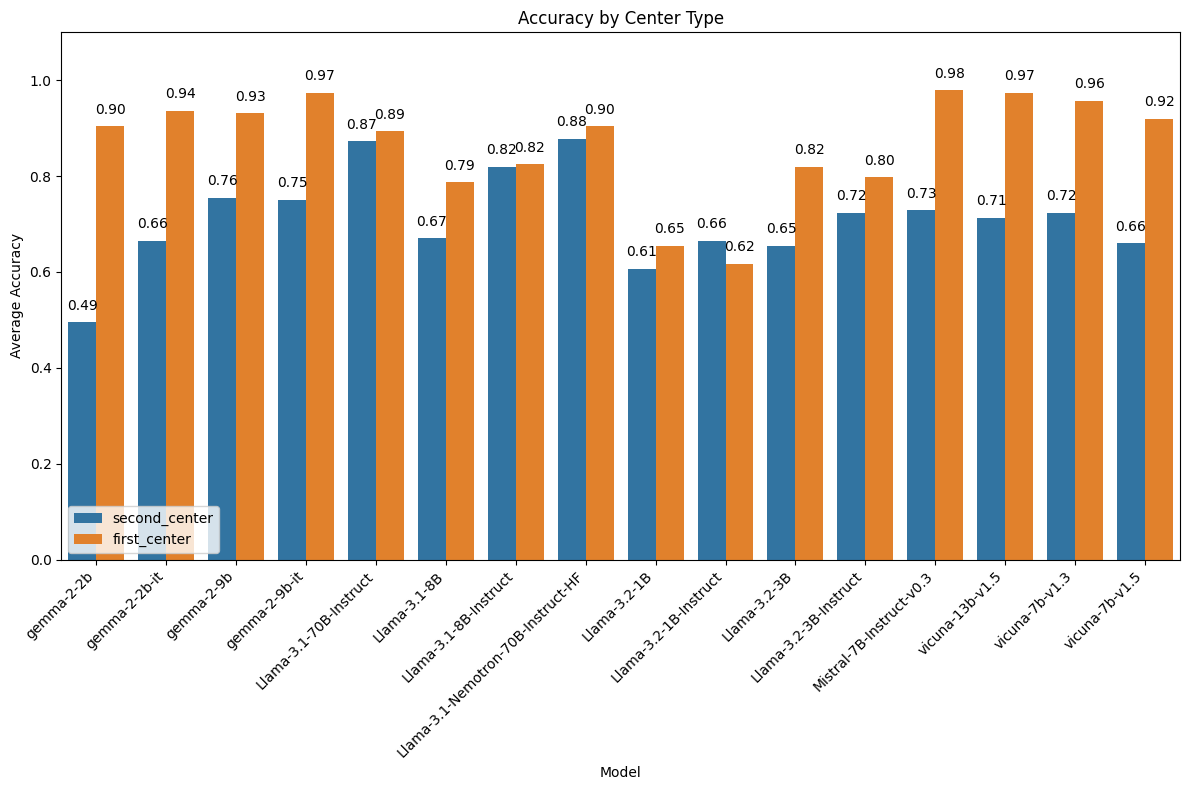

In [105]:
# Calculate the average accuracy for "first_center" and "second_center" types per model
accuracy_by_model_and_type['center_type'] = accuracy_by_model_and_type['type'].apply(lambda x: 'first_center' if x.startswith('first_center') else 'second_center')
avg_accuracy = accuracy_by_model_and_type.groupby(['model', 'center_type'])['accuracy'].mean().reset_index()
avg_accuracy = avg_accuracy.sort_values(
    by=['model'],
    key=lambda col: col.str.lower(),
).reset_index(drop=True)

# Set up the figure
plt.figure(figsize=(12, 8))

# Plot bar plot for the average accuracy for each model and center type
bar_plot = sns.barplot(
    data=avg_accuracy,
    x='model',
    y='accuracy',
    hue='center_type'
)
plt.title('Accuracy by Center Type')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.legend(loc='lower left')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0,1.1)

for bar in bar_plot.patches:
    if bar.get_width() == 0.0:
        continue

    height = bar.get_height()
    bar_plot.text(
        bar.get_x() + bar.get_width() / 2,  # X position of text (centered on each bar)
        height + 0.02,                      # Y position slightly above the top of each bar
        f'{height:.2f}',                    # Text to display (formatted to 2 decimal places)
        ha='center',                        # Center align horizontally
        va='bottom'                         # Bottom align text to position it above the bar
    )

# Show plot
plt.tight_layout()
plt.show()


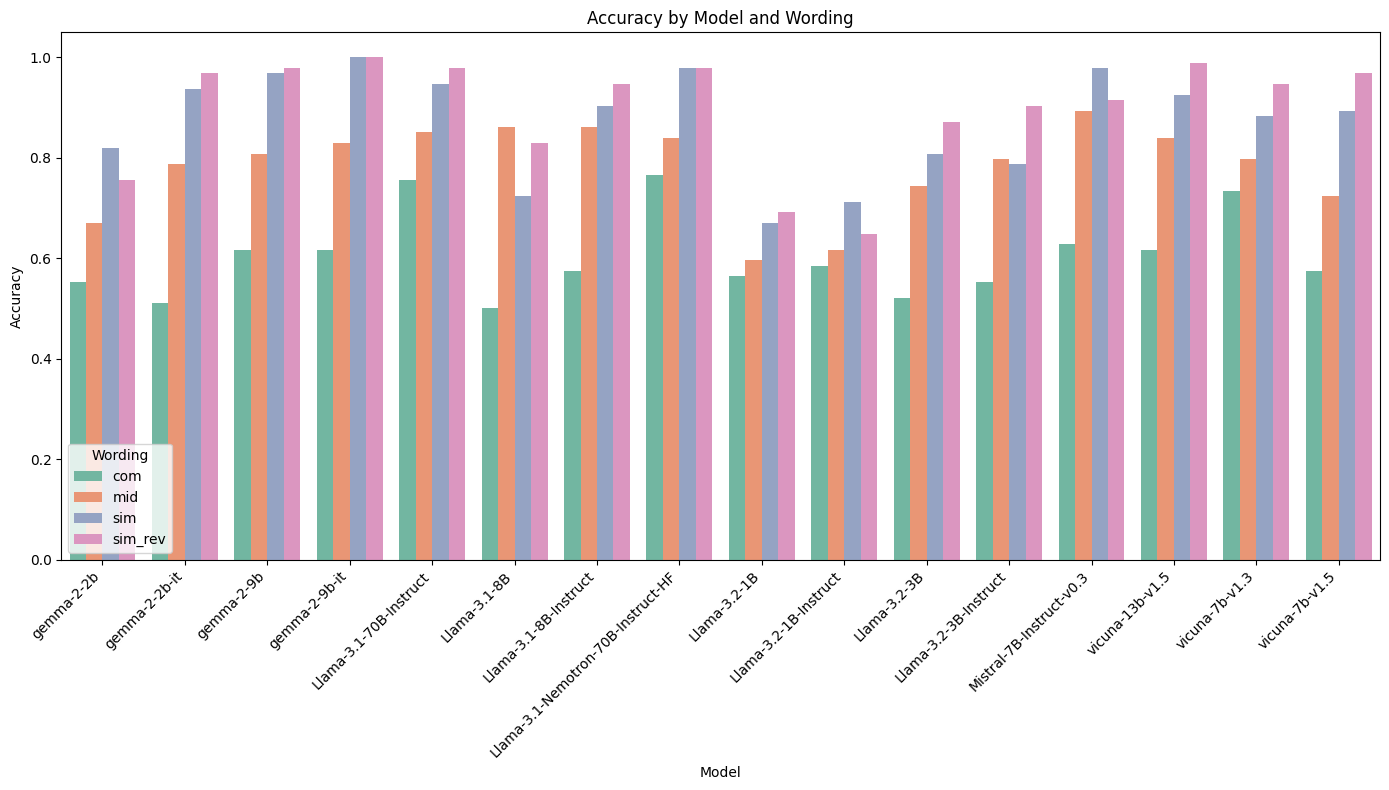

In [120]:
# Extract center type and suffix from the `type` column
accuracy_by_model_and_type['center_type'] = accuracy_by_model_and_type['type'].apply(lambda x: 'first_center' if x.startswith('first_center') else 'second_center')
accuracy_by_model_and_type['suffix'] = accuracy_by_model_and_type['type'].apply(lambda x: '_'.join(x.split('_')[2:]))

# Calculate the average accuracy for each model, center type, and suffix
avg_accuracy = accuracy_by_model_and_type.groupby(['model', 'suffix'])['accuracy'].mean().reset_index()
avg_accuracy = avg_accuracy.sort_values(
    by=['model', 'suffix'],
    key=lambda col: col.str.lower(),
).reset_index(drop=True)

# Set up the figure
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(
    data=avg_accuracy,
    x='model',
    y='accuracy',
    hue='suffix',  # Combining center type and suffix for color coding
    palette='Set2'
)

# Customize the plot
plt.title('Accuracy by Model and Wording')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend(title='Wording', loc='lower left')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

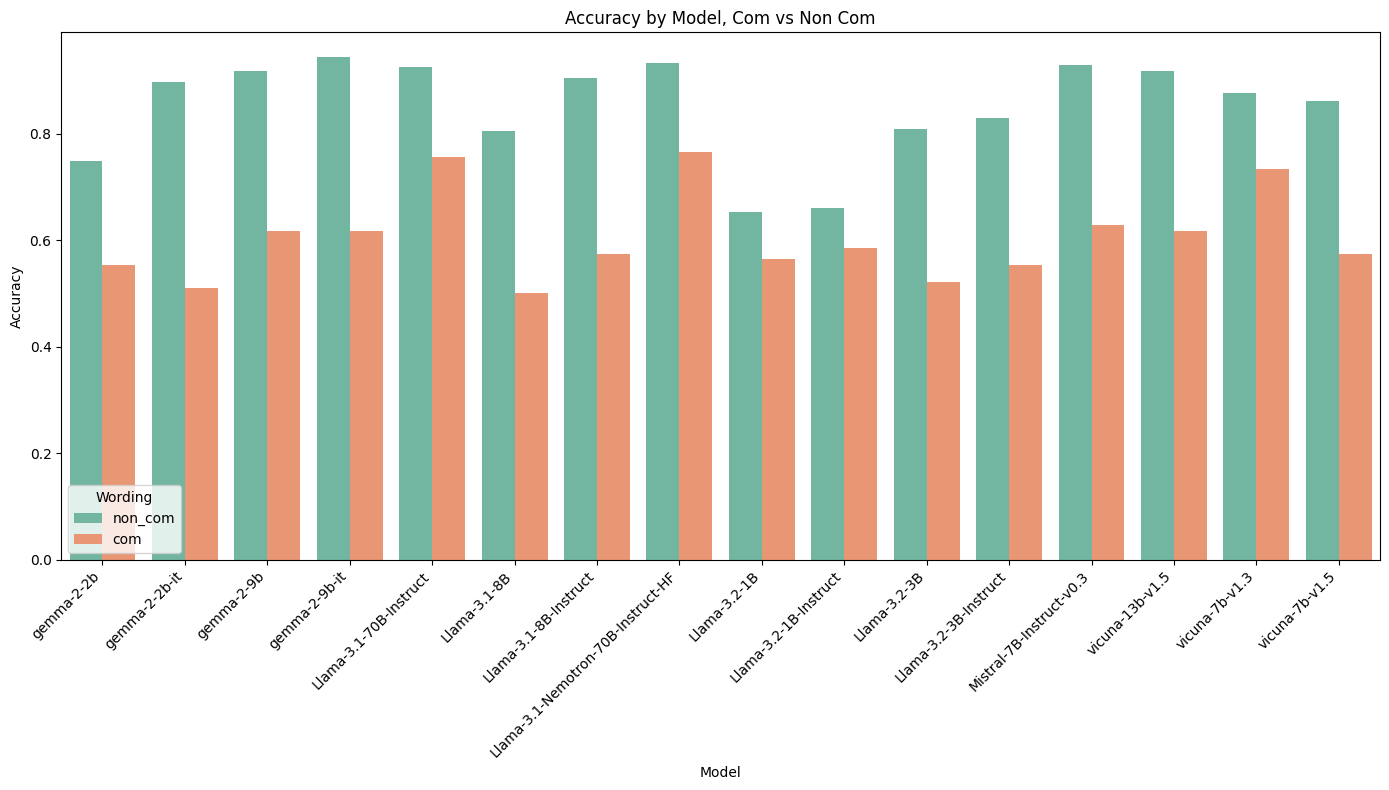

In [107]:
# Extract center type and suffix from the `type` column
accuracy_by_model_and_type['center_type'] = accuracy_by_model_and_type['type'].apply(lambda x: 'first_center' if x.startswith('first_center') else 'second_center')
accuracy_by_model_and_type['suffix'] = accuracy_by_model_and_type['type'].apply(lambda x: 'com' if 'com' in x else 'non_com')

# Calculate the average accuracy for each model, center type, and suffix
avg_accuracy = accuracy_by_model_and_type.groupby(['model', 'suffix'])['accuracy'].mean().reset_index()
avg_accuracy = avg_accuracy.sort_values(
    by=['model'],
    key=lambda col: col.str.lower(),
).reset_index(drop=True)

# Set up the figure
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(
    data=avg_accuracy,
    x='model',
    y='accuracy',
    hue='suffix',  # Combining center type and suffix for color coding
    palette='Set2'
)

# Customize the plot
plt.title('Accuracy by Model, Com vs Non Com')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend(title='Wording', loc='lower left')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()